In [1]:

#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificacion ----

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#----  Curva ROC y PR ----

from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

#---- Importaciones para el modelo de random forest Classification ----

from sklearn.ensemble import RandomForestClassifier

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV


In [2]:
%load_ext kedro.ipython

[10/17/25 17:06:05] INFO     Using                                                                  ]8;id=142438;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=812851;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro                
                             \framework\project\rich_logging.yml' as logging configuration.                        

[10/17/25 17:06:06] INFO     Registered line magic '%reload_kedro'                                   ]8;id=931021;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=279662;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=445449;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=639914;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=993971;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=869562;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\proyecto-ml.                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/17/25 17:06:07] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=188924;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=73110;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/17/25 17:06:08] INFO     Kedro project proteyecto-ml                                            ]8;id=622458;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=530491;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=925216;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=171267;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=296396;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=400780;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [7]:
data_c5 = catalog.load("data_final")

[10/17/25 17:10:08] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=525674;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=939694;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [8]:
X = data_c5[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data_c5['haswon']



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

     

In [14]:


model = RandomForestClassifier(

    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42,
    n_jobs=-1
) # a entrenar
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


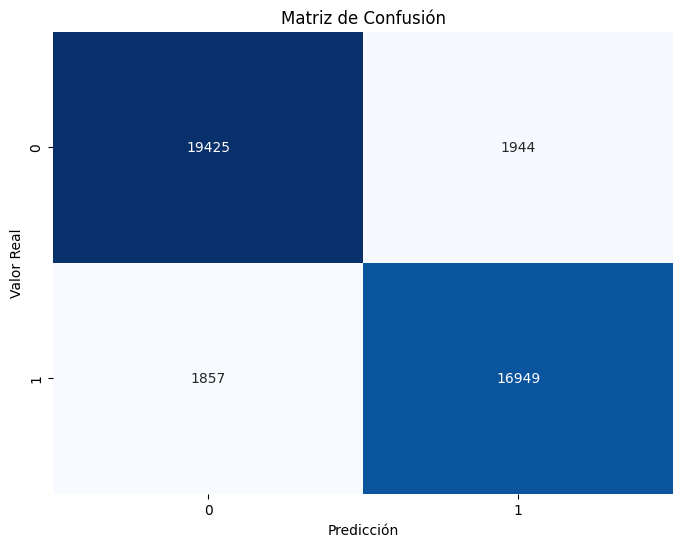

In [16]:

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()
     


In [17]:

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     21369
           1       0.90      0.90      0.90     18806

    accuracy                           0.91     40175
   macro avg       0.90      0.91      0.91     40175
weighted avg       0.91      0.91      0.91     40175

Accuracy Score: 0.9053889234598631


In [18]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")
     

Sensitivity: 0.9013
Specificity: 0.9090


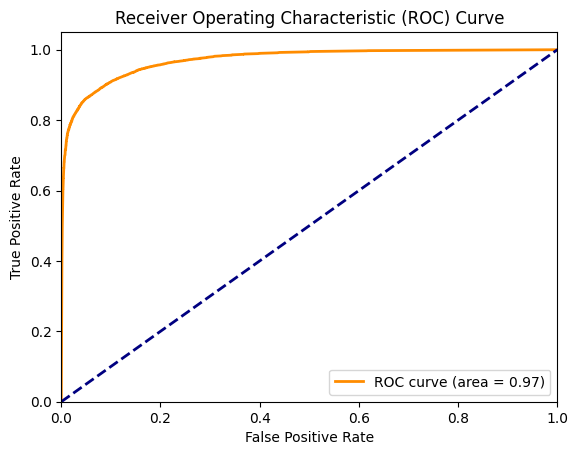

In [19]:

# Calculate predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

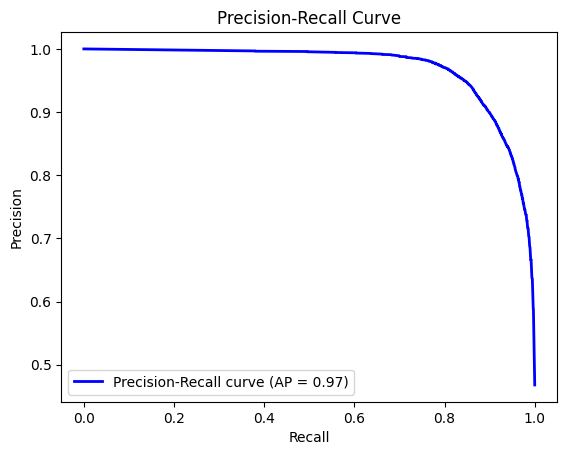

In [20]:

# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [21]:
param_grid = {
    'n_estimators': [108, 200],
    'class_weight': ['balanced', {0:1, 1:2.2}, {0:1, 1:2.4}, {0:1, 1:2.6}],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Get the best model
best_grid = grid_search.best_estimator_

# Make predictions with the best model
grid_predictions = best_grid.predict(X_test)

# Evaluate the best model
print("\nMatriz de Confusión (Grid Search):")
print(confusion_matrix(y_test, grid_predictions))

print("\nReporte de Clasificación (Grid Search):")
print(classification_report(y_test, grid_predictions))

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, grid_predictions))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores parámetros: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Matriz de Confusión (Grid Search):
[[19907  1462]
 [ 2085 16721]]

Reporte de Clasificación (Grid Search):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     21369
           1       0.92      0.89      0.90     18806

    accuracy                           0.91     40175
   macro avg       0.91      0.91      0.91     40175
weighted avg       0.91      0.91      0.91     40175


Accuracy Score (Grid Search):
0.9117112632233977


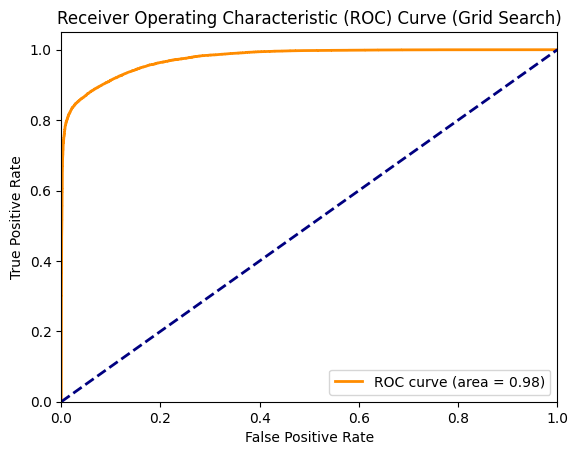

 -


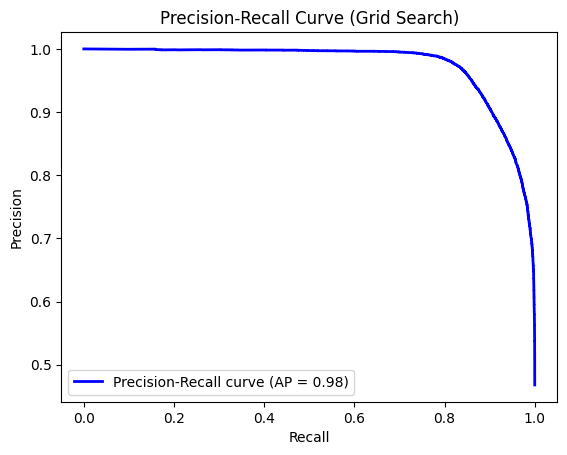

In [22]:

grid_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calculate ROC curve using the best model
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, grid_pred_proba)

# Calculate AUC (Area Under the Curve) using the best model
roc_auc_grid = auc(fpr_grid, tpr_grid)

# Plot the ROC curve for the best model
plt.figure()
plt.plot(fpr_grid, tpr_grid, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_grid)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Grid Search)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision and recall for different thresholds using the best model
precision_grid, recall_grid, _ = precision_recall_curve(y_test, grid_pred_proba)

# Calculate the average precision score using the best model
average_precision_grid = average_precision_score(y_test, grid_pred_proba)
print(" -")
# Plot the Precision-Recall curve for the best model
plt.figure()
plt.plot(recall_grid, precision_grid, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_grid)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Grid Search)')
plt.legend(loc="lower left")
plt.show()